# Optimized Reward Functions

## Position reward based upon approach course

This reward gives a higher reward the closer the airplane gets on approach course inbound to the FAF

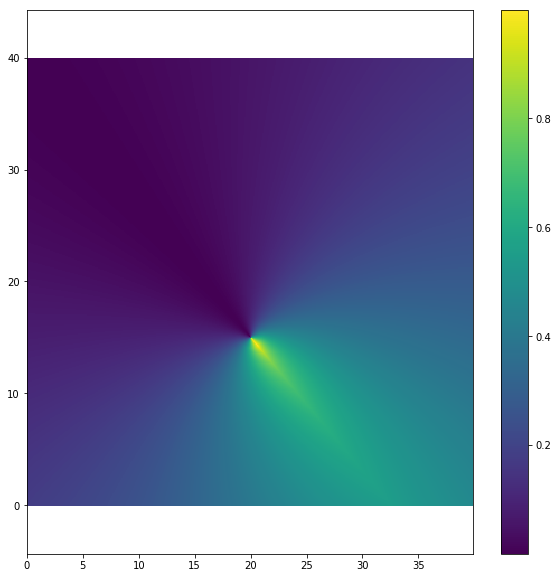

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

def relative_angle(angle1, angle2):
    return (angle2 - angle1 + 180) % 360 - 180

def f_reward(x, y):    
    to_faf_x = x_faf - x
    to_faf_y = y_faf - y
    d_faf = np.hypot(to_faf_x, to_faf_y)
    
    reward_faf = 1/np.maximum(np.power(d_faf, 0.2),1)
    angle_faf = np.degrees(np.arctan2(to_faf_y, to_faf_x))
    
    reward_app_sector = np.power(np.abs(relative_angle(phi_runway, angle_faf))/180, 1.5)
    
    reward = reward_app_sector * reward_faf
    
    return reward

x_faf = 20
y_faf = 15

phi_runway = 310
x_runway = 20
y_runway = 20

x = np.arange(0, 40, 0.1)
y = np.arange(0, 40, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = f_reward(xx, yy)

plt.figure(figsize=(10,10))
plt.pcolormesh(x,y,z)
plt.colorbar()
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.show()


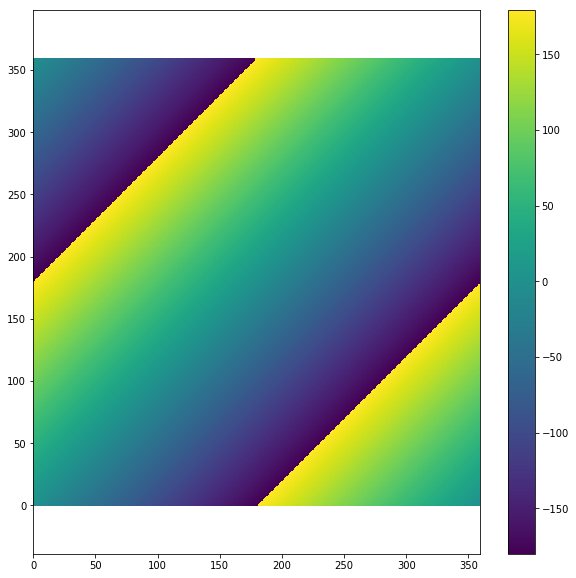

In [2]:
x = np.arange(0, 360, 1)
y = np.arange(0, 360, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = relative_angle(xx, yy)
#z = np.abs(z)

plt.figure(figsize=(10,10))
plt.pcolormesh(x,y,z)
plt.colorbar()
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.show()


In [3]:
relative_angle(90, 220)

130

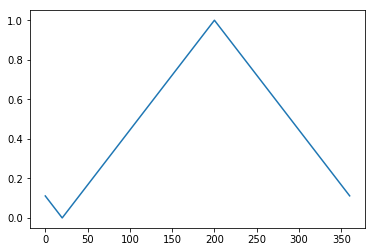

In [4]:
x = np.arange(0, 360, 0.1)
y = np.abs(relative_angle(20, x))/180

plt.plot(x, y)
plt.show()

## Reward of airplane course to runway heading
Needs to be based upon the side of the approach course on which the aicraft resides. 

This can be factored in using the signum of the relative angle between the angles of the approach course and airplanes relative heading to the FAF

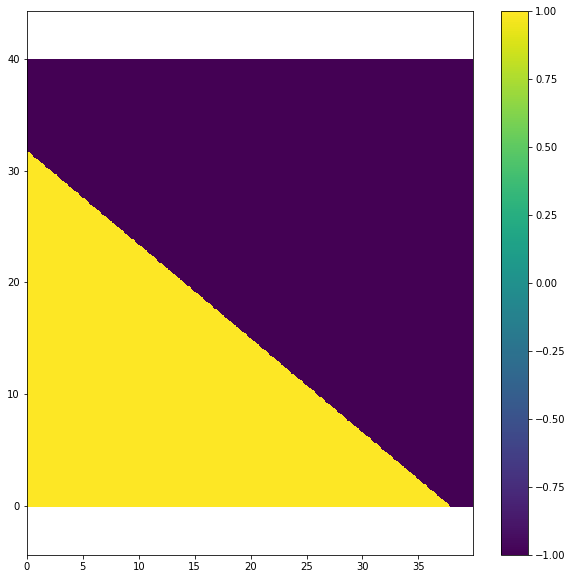

In [5]:
def f_approach_sector_side(x, y):    
    to_faf_x = x_faf - x
    to_faf_y = y_faf - y
    
    angle_faf = np.degrees(np.arctan2(to_faf_x, to_faf_y))
    
    approach_sector_side = np.sign(relative_angle(phi_runway, angle_faf))
    
    return approach_sector_side

x_faf = 20
y_faf = 15

phi_runway = 310
x_runway = 20
y_runway = 20

x = np.arange(0, 40, 0.1)
y = np.arange(0, 40, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = f_approach_sector_side(xx, yy)

plt.figure(figsize=(10,10))
plt.pcolormesh(x,y,z)
plt.colorbar()
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.show()

In [6]:
relative_angle(phi_runway, 270)

-40

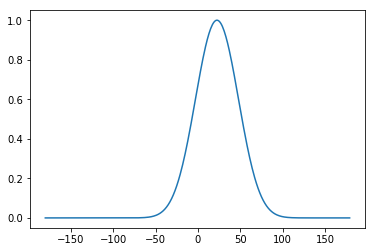

In [7]:
def f_reward_angle(x):
    return np.power(-np.power((x-22.5)/202, 2)+1, 32)

x = np.arange(-180, 180, 1)
y = f_reward_angle(x)

plt.plot(x, y)
plt.show()

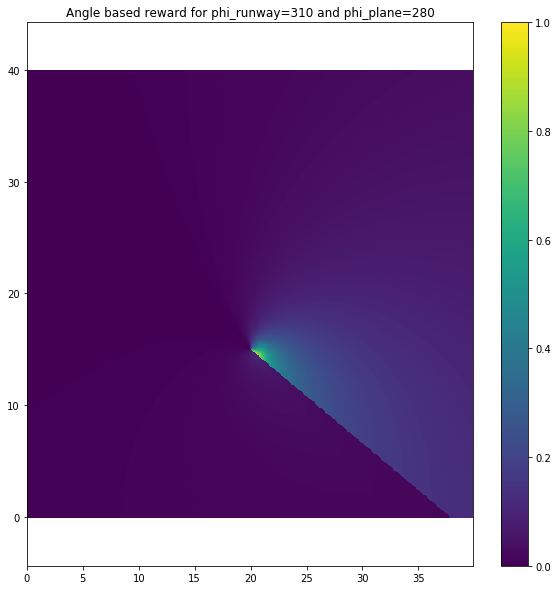

In [30]:
def f_reward_on_intercept_course(x, y, phi_plane):    
    to_faf_x = x_faf - x
    to_faf_y = y_faf - y
    d_faf = np.hypot(to_faf_x, to_faf_y)
    
    reward_faf = 1/np.maximum(np.power(d_faf, 0.6),1)
    
    angle_faf = np.degrees(np.arctan2(to_faf_y, to_faf_x))
    reward_app_sector = np.power(np.abs(relative_angle(phi_runway, angle_faf))/180, 1.5)
    
    plane_to_runway = relative_angle(phi_runway, phi_plane)
    side = f_approach_sector_side(x, y)
    
    reward = f_reward_angle(side * plane_to_runway) * reward_app_sector * reward_faf
    
    return reward

x_faf = 20
y_faf = 15

phi_runway = 310
phi_plane = 280

x_runway = 20
y_runway = 20

x = np.arange(0, 40, 0.1)
y = np.arange(0, 40, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = f_reward_on_intercept_course(xx, yy, phi_plane)

plt.figure(figsize=(10,10))
plt.pcolormesh(x,y,z, vmin=0.0, vmax=1.0)
plt.colorbar()
ax = plt.gca()
ax.set_aspect('equal', 'datalim')
plt.title("Angle based reward for phi_runway=%d and phi_plane=%d" % (phi_runway, phi_plane))
plt.show()

In [9]:
%matplotlib inline
from ipywidgets import interactive

x = np.arange(0, 40, 0.5)
y = np.arange(0, 40, 0.5)
xx, yy = np.meshgrid(x, y, sparse=True)

def plot_interactive_approach_sector_reward(phi_plane):
    z = f_reward_on_intercept_course(xx, yy, phi_plane)
    
    plt.figure(figsize=(10,10))
    plt.pcolormesh(x,y,z, vmin=0.0, vmax=1.0)
    plt.colorbar()
    ax = plt.gca()
    ax.set_aspect('equal', 'datalim')
    plt.title("Angle based reward for phi_runway=%d and phi_plane=%d" % (phi_runway, phi_plane))
    plt.show()

interactive_plot = interactive(plot_interactive_approach_sector_reward, phi_plane=(0.0, 360.0))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot

interactive(children=(FloatSlider(value=180.0, description='phi_plane', max=360.0), Output(layout=Layout(heigh…